In [70]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Flatten)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, roc_curve, auc, precision_score, recall_score)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess_input


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [44]:
def show_sample_images(generator, class_names, num_images=5):
    # Get batch of images and labels
    images, labels = next(generator)
    plt.figure(figsize=(15,5))
    for i in range(num_images):
        index = random.randint(0, len(images) - 1)
        image = images[index]
        label = labels[index]
        if generator.class_mode == 'categorical':
            label_index = np.argmax(label)
            label_name = class_names[label_index]
        else:
            label_name = class_names[int(label)]
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(f'Label: {label_name}')
        plt.axis('off')
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB
None
   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 

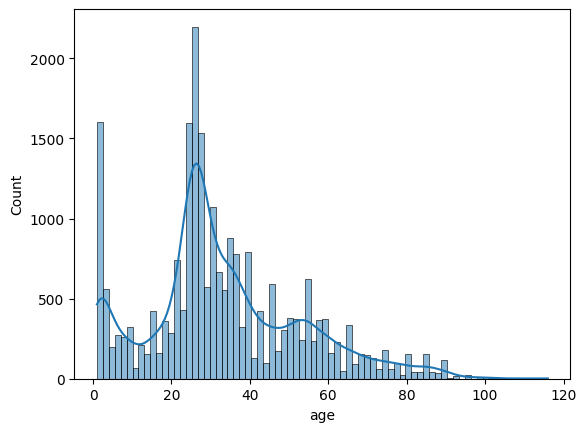

In [89]:
# MODEL_NAME = 'ageing'
# MODELS_DIR = '../models/'
# os.makedirs(MODELS_DIR, exist_ok=True)

# OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
# os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)

# OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
# os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)

df=pd.read_csv("../Data/raw/3/age_gender.csv")
print(df.info())
print(df.head())
print(df.isna().sum())
df.drop('img_name',axis=1,inplace=True)
sns.histplot(data=df,x='age',kde=True)

df['age'] = pd.qcut(df['age'], q=4, labels=[0, 1, 2, 3])


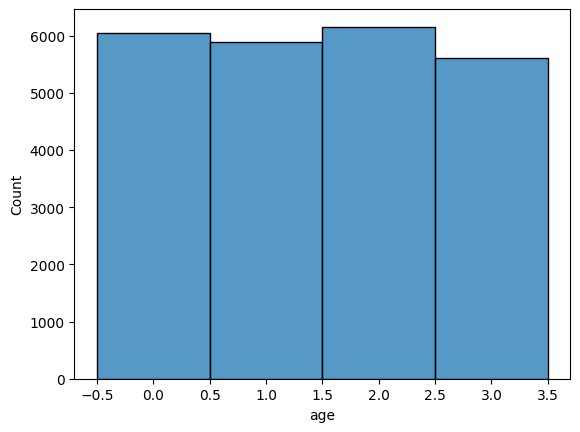

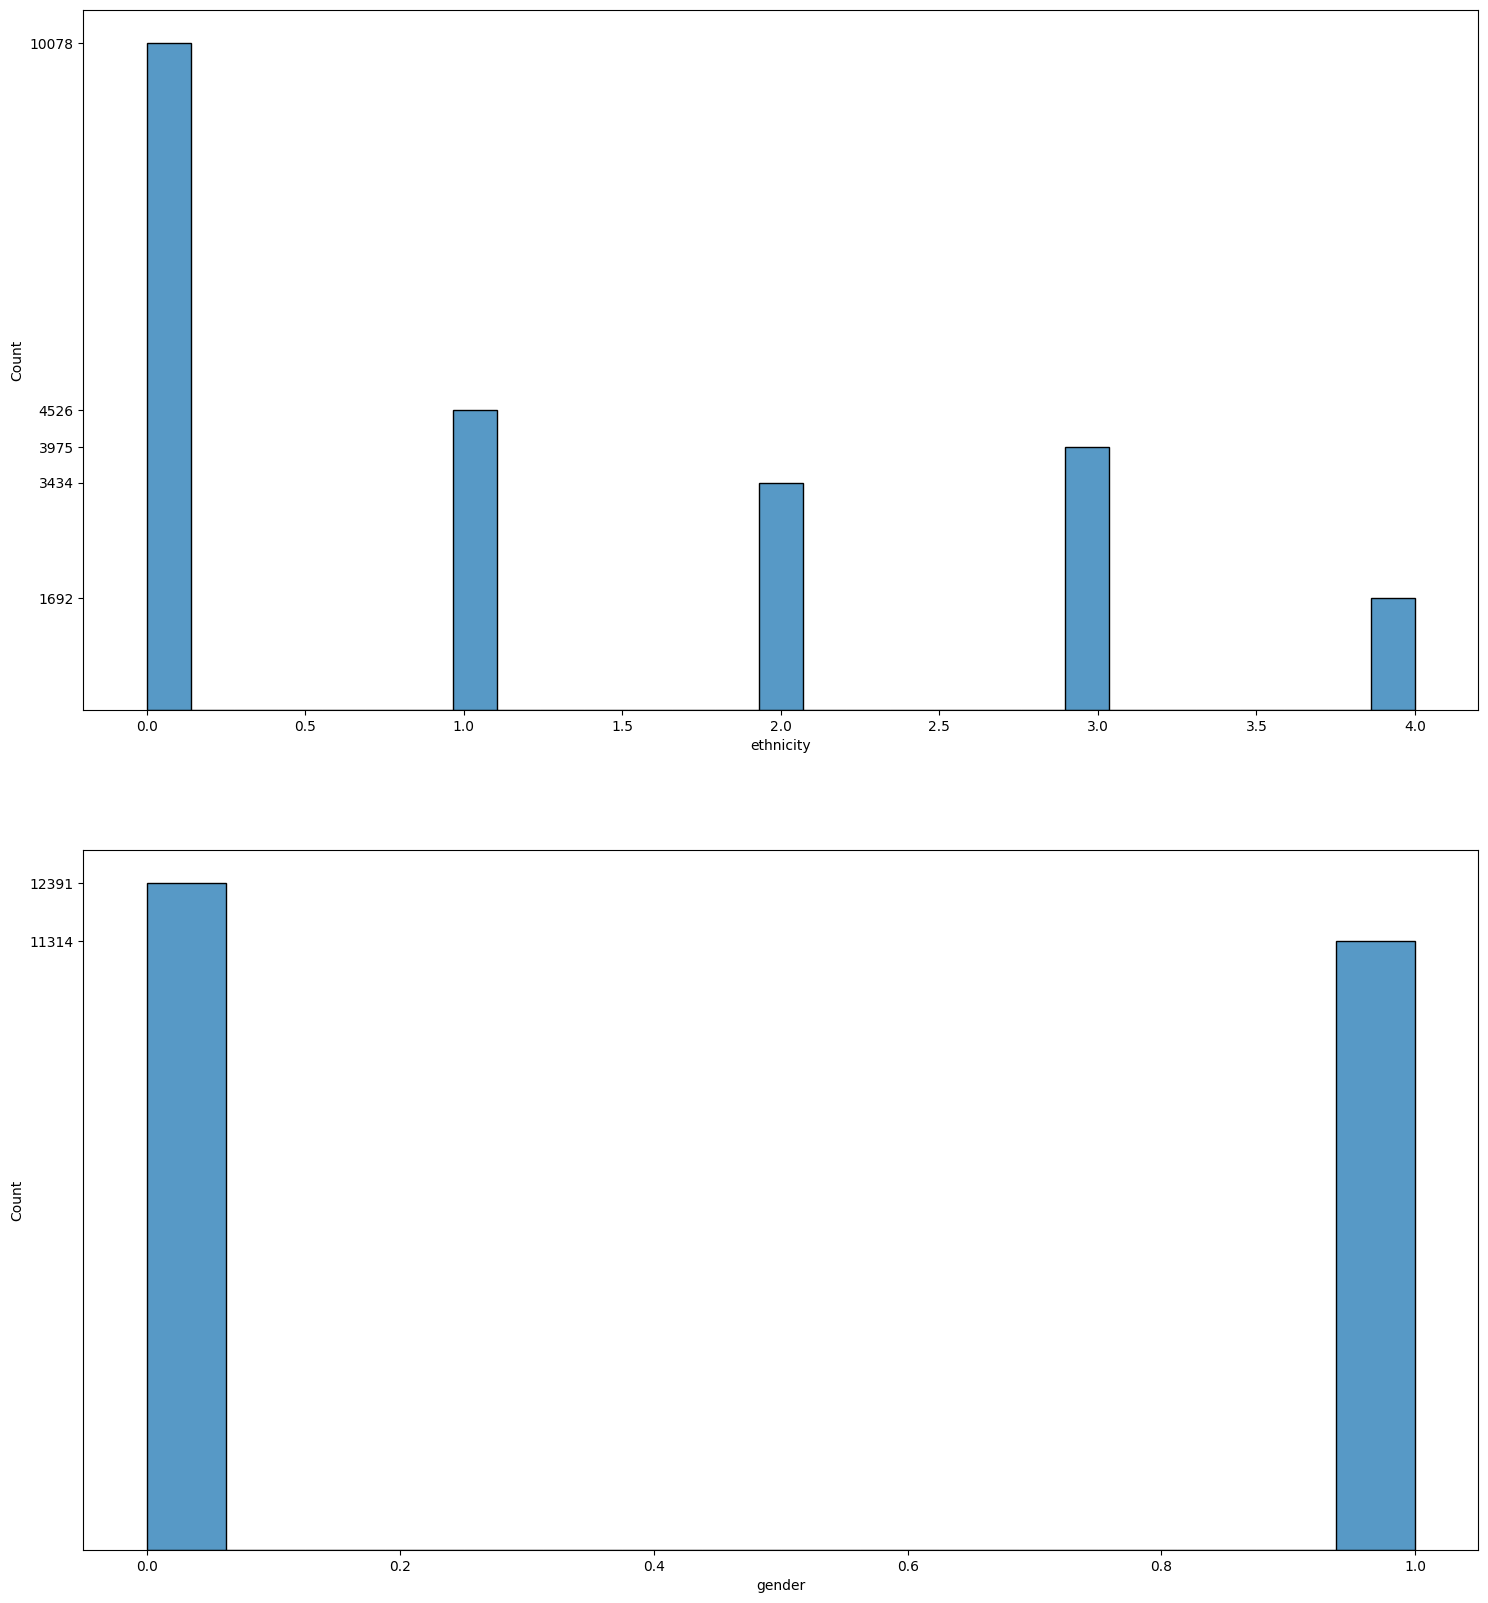

This is the target label Y
   ethnicity  gender age
0          2       0   0
1          2       0   0
2          2       0   0
3          2       0   0
4          2       0   0
(23705, 48, 48)


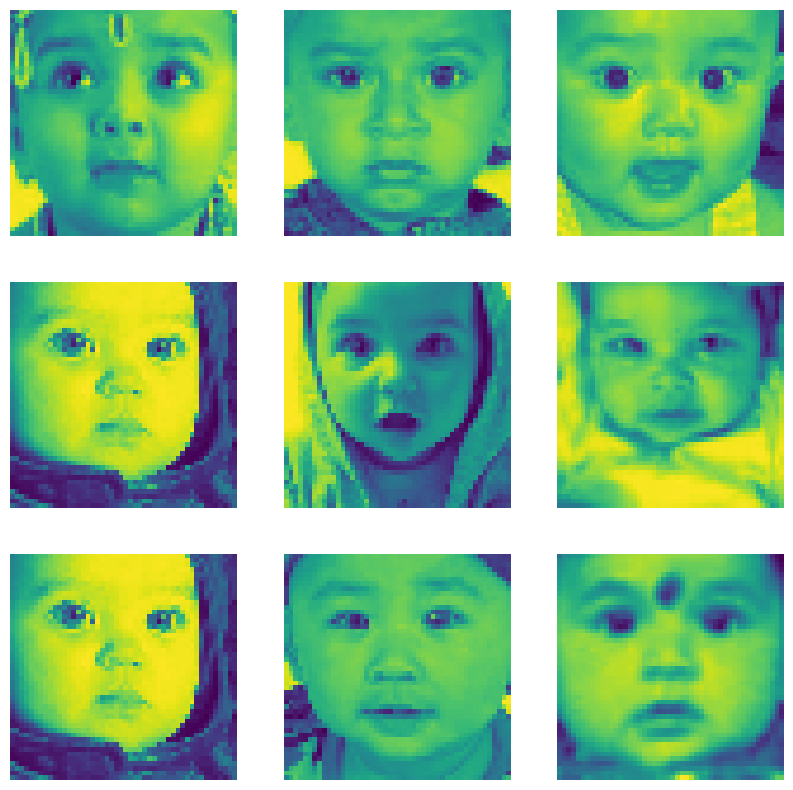

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 6400)              0         
                                                                 
 dense_115 (Dense)           (None, 128)             

: 

In [ ]:

# Plotting the distribution of the age
sns.histplot(data=df,x='age')


# Plotting for ethnticity and gender
categoricals=['ethnicity','gender']
fig,axes=plt.subplots(2,1,figsize=(18,20))
for i, col in enumerate(categoricals):
    sns.histplot(data=df,x=col,ax=axes[i])
    axes[i].set_yticks(df[col].value_counts())
plt.show()


NUM_PIXELS=len(df.pixels[0].split(' '))
IMG_HEIGHT=int(np.sqrt(2304))
IMG_WIDTH=int(np.sqrt(2304))





y=df[['ethnicity','gender','age']]

print("This is the target label Y")
print(y.head())


X=df.drop(columns=['ethnicity','gender','age'],axis=1)
X = pd.Series(X['pixels'])
X = X.apply(lambda x: x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)
X = np.reshape(X, (-1, 48, 48))

print(X.shape)

plt.figure(figsize=(10, 10))
for index,image in enumerate(np.random.randint(0, 1000, 9)):
    plt.subplot(3,3,index+1)
    plt.imshow(X[image])
    plt.axis('off')

plt.show()



y_gender =np.array(y['gender'])
y_ethnicity =np.array(y['ethnicity'])
y_age = np.array(y['age'])

# Binarize the output
X= X / X.max()

# Reshape input data (add channel dimension for grayscale)
X = X.reshape(-1, 48, 48, 1)

# One-hot encode the labels
y_gender = to_categorical(y_gender, num_classes=4)

# Create the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
X_train,X_test,y_train,y_test=train_test_split(X,y_gender,train_size=0.7)
# Output layer
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Summary of the model
model.summary()


history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)



In [67]:


# Define paths
TRAIN_DIR_FAST = '../Data/processed/dataset2_processed/train/'
VALIDATION_DIR_FAST = '../Data/processed/dataset2_processed/test/'

TRAIN_DIR_ACCURATE = '../Data/processed/dataset1/train/'
VALIDATION_DIR_ACCURATE = '../Data/processed/dataset1/test/'

MODELS_DIR = '../models/'
os.makedirs(MODELS_DIR, exist_ok=True)

OUTPUT_CONFUSION_MATRICES_DIR = '../output/confusion_matrices/'
os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)

OUTPUT_EVALUATION_METRICS_DIR = '../output/evaluation_metrics/'
os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)



def fast_model():
    # Fast Model - Binary Classification
    print("Training Fast Model...")

    # Data generators for Fast Model
    train_datagen_fast = ImageDataGenerator(
        rescale=1./255, horizontal_flip=True, zoom_range=0.2)
    validation_datagen_fast = ImageDataGenerator(rescale=1./255)

    train_generator_fast = train_datagen_fast.flow_from_directory(
        TRAIN_DIR_FAST, target_size=(224, 224), batch_size=32, class_mode='binary')

    validation_generator_fast = validation_datagen_fast.flow_from_directory(
        VALIDATION_DIR_FAST, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

    # Define Fast Model architecture
    model_fast = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model_fast.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping_fast = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint_fast = ModelCheckpoint(
        '../models/model_fast.h5', save_best_only=True)

    # Train Fast Model
    history_fast = model_fast.fit(
        train_generator_fast,
        epochs=30,
        validation_data=validation_generator_fast,
        callbacks=[early_stopping_fast, checkpoint_fast]
    )

    # Create output directories for this model
    MODEL_NAME = 'fast_model'
    OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
    os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
    OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
    os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)

    # Evaluate Fast Model
    print("Evaluating Fast Model...")
    # Get true labels and predictions
    validation_generator_fast.reset()
    Y_true = validation_generator_fast.classes
    Y_pred_prob = model_fast.predict(validation_generator_fast, verbose=1)
    Y_pred = (Y_pred_prob > 0.5).astype('int32').reshape(-1)

    # Calculate evaluation accuracy
    evaluation_metrics = model_fast.evaluate(validation_generator_fast, verbose=1)
    evaluation_loss = evaluation_metrics[0]
    evaluation_accuracy = evaluation_metrics[1]
    print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

    # Calculate F1 Score, Precision, Recall
    f1 = f1_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Classification Report
    target_names = list(validation_generator_fast.class_indices.keys())
    print("Classification Report:")
    print(classification_report(Y_true, Y_pred, target_names=target_names))

    # Confusion Matrix with Percentages
    cm = confusion_matrix(Y_true, Y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)

    # Prepare annotations with percentage symbol
    annot_labels = np.empty_like(cm_percentage).astype(str)
    nrows, ncols = cm_percentage.shape
    for i in range(nrows):
        for j in range(ncols):
            annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

    plt.figure(figsize=(6,4))
    sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix (Percentage) - Fast Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # Save confusion matrix
    confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
    plt.savefig(confusion_matrix_path)
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_true, Y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Fast Model')
    plt.legend(loc='lower right')
    # Save ROC curve
    roc_curve_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'roc_curve.png')
    plt.savefig(roc_curve_path)
    plt.show()

    # Save evaluation metrics to CSV
    metrics_data = {
        'Metric': ['Validation Accuracy', 'Validation Loss', 'F1 Score', 'Precision', 'Recall', 'AUC'],
        'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall, roc_auc]
    }
    metrics_df = pd.DataFrame(metrics_data)
    metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
    metrics_df.to_csv(metrics_csv_path, index=False)

    # Save the final model
    model_fast.save('../models/model_fast_final.h5')


def accurate_model():
    print("Training Accurate Model...")

    from sklearn.preprocessing import label_binarize

    # Data generators for Accurate Model
    train_datagen_accurate = ImageDataGenerator(
        rescale=1./255, horizontal_flip=True, rotation_range=20
        )
    validation_datagen_accurate = ImageDataGenerator(rescale=1./255)

    train_generator_accurate = train_datagen_accurate.flow_from_directory(
        TRAIN_DIR_ACCURATE,
        target_size = (224,224),
        class_mode = 'categorical',
        shuffle = True,
        batch_size = 32,
        color_mode = 'rgb',
        x_col = 'pth',
        y_col = 'label'
        # subset = 'training'
    )

    validation_generator_accurate = validation_datagen_accurate.flow_from_directory(
        VALIDATION_DIR_ACCURATE,
        target_size = (224,224),
        class_mode = 'categorical',
        shuffle = False,
        batch_size = 32,
        color_mode = 'rgb',
        x_col = 'pth',
        y_col = 'label',    
          )

    # Get class names
    target_names = list(validation_generator_accurate.class_indices.keys())

    # Define Accurate Model architecture using ResNet50
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model_accurate = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(len(target_names), activation='softmax')  # Number of classes
    ])

    model_accurate.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping_accurate = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint_accurate = ModelCheckpoint(
        '../models/model_accurate.h5', save_best_only=True)

    # Train Accurate Model
    history_accurate = model_accurate.fit(
        train_generator_accurate,
        epochs=30,
        validation_data=validation_generator_accurate,
        callbacks=[early_stopping_accurate, checkpoint_accurate]
    )

    # Create output directories for this model
    MODEL_NAME = 'accurate_model'
    OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
    os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
    OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
    os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)

    # Evaluate Accurate Model
    print("Evaluating Accurate Model...")
    validation_generator_accurate.reset()
    Y_true = validation_generator_accurate.classes
    Y_pred_prob = model_accurate.predict(validation_generator_accurate, verbose=1)
    Y_pred = np.argmax(Y_pred_prob, axis=1)

    # Calculate evaluation accuracy
    evaluation_metrics = model_accurate.evaluate(validation_generator_accurate, verbose=1)
    evaluation_loss = evaluation_metrics[0]
    evaluation_accuracy = evaluation_metrics[1]
    print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

    # Calculate F1 Score, Precision, Recall
    f1 = f1_score(Y_true, Y_pred, average='weighted')
    precision = precision_score(Y_true, Y_pred, average='weighted')
    recall = recall_score(Y_true, Y_pred, average='weighted')
    print(f"Weighted F1 Score: {f1:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(Y_true, Y_pred, target_names=target_names))

    # Confusion Matrix with Percentages
    cm = confusion_matrix(Y_true, Y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)

    # Prepare annotations with percentage symbol
    annot_labels = np.empty_like(cm_percentage).astype(str)
    nrows, ncols = cm_percentage.shape
    for i in range(nrows):
        for j in range(ncols):
            annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

    plt.figure(figsize=(10,8))
    sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix (Percentage) - Accurate Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # Save confusion matrix
    confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
    plt.savefig(confusion_matrix_path)
    plt.show()

    # ROC Curves for each class
    Y_true_binarized = label_binarize(Y_true, classes=range(len(target_names)))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(target_names)):
        fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], Y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = {:.4f})'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Class: {target_names[i]}')
        plt.legend(loc='lower right')
        # Save ROC curve for each class
        roc_curve_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, f'roc_curve_{target_names[i]}.png')
        plt.savefig(roc_curve_path)
        plt.close()

    # Save evaluation metrics to CSV
    metrics_data = {
        'Metric': ['Validation Accuracy', 'Validation Loss', 'Weighted F1 Score', 'Weighted Precision', 'Weighted Recall'],
        'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
    }
    metrics_df = pd.DataFrame(metrics_data)
    metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
    metrics_df.to_csv(metrics_csv_path, index=False)

    # Save the final model
    model_accurate.save('../models/model_accurate_final.h5')


def accurate_model_2():
    print("Training Accurate Model 2 using MobileNetV2...")

    from tensorflow.keras.applications import MobileNetV2
    from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
    from sklearn.preprocessing import label_binarize

    # Data generators for Accurate Model 2
    train_datagen_accurate = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        horizontal_flip=True,
        rotation_range=20)
    validation_datagen_accurate = ImageDataGenerator(preprocessing_function=preprocess_input)

    train_generator_accurate = train_datagen_accurate.flow_from_directory(
        TRAIN_DIR_ACCURATE, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)

    validation_generator_accurate = validation_datagen_accurate.flow_from_directory(
        VALIDATION_DIR_ACCURATE, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

    # Get class names
    target_names = list(validation_generator_accurate.class_indices.keys())

    # Define Accurate Model 2 architecture using MobileNetV2
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model_accurate_2 = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(len(target_names), activation='softmax')  # Number of classes
    ])

    model_accurate_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping_accurate_2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint_accurate_2 = ModelCheckpoint(
        '../models/model_accurate_2.h5', save_best_only=True)

    # Train Accurate Model 2
    history_accurate_2 = model_accurate_2.fit(
        train_generator_accurate,
        epochs=30,
        validation_data=validation_generator_accurate,
        callbacks=[early_stopping_accurate_2, checkpoint_accurate_2]
    )

    # Create output directories for this model
    MODEL_NAME = 'accurate_model_2'
    OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
    os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
    OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
    os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)

    # Evaluate Accurate Model 2
    print("Evaluating Accurate Model 2...")
    validation_generator_accurate.reset()
    Y_true = validation_generator_accurate.classes
    Y_pred_prob = model_accurate_2.predict(validation_generator_accurate, verbose=1)
    Y_pred = np.argmax(Y_pred_prob, axis=1)

    # Calculate evaluation accuracy
    evaluation_metrics = model_accurate_2.evaluate(validation_generator_accurate, verbose=1)
    evaluation_loss = evaluation_metrics[0]
    evaluation_accuracy = evaluation_metrics[1]
    print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

    # Calculate F1 Score, Precision, Recall
    f1 = f1_score(Y_true, Y_pred, average='weighted')
    precision = precision_score(Y_true, Y_pred, average='weighted')
    recall = recall_score(Y_true, Y_pred, average='weighted')
    print(f"Weighted F1 Score: {f1:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(Y_true, Y_pred, target_names=target_names))

    # Confusion Matrix with Percentages
    cm = confusion_matrix(Y_true, Y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percentage = np.nan_to_num(cm_percentage)

    # Prepare annotations with percentage symbol
    annot_labels = np.empty_like(cm_percentage).astype(str)
    nrows, ncols = cm_percentage.shape
    for i in range(nrows):
        for j in range(ncols):
            annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

    plt.figure(figsize=(10,8))
    sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix (Percentage) - Accurate Model 2 (MobileNetV2)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # Save confusion matrix
    confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
    plt.savefig(confusion_matrix_path)
    plt.show()

    # ROC Curves for each class
    Y_true_binarized = label_binarize(Y_true, classes=range(len(target_names)))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(target_names)):
        fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], Y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = {:.4f})'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Class: {target_names[i]}')
        plt.legend(loc='lower right')
        # Save ROC curve for each class
        roc_curve_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, f'roc_curve_{target_names[i]}.png')
        plt.savefig(roc_curve_path)
        plt.close()

    # Save evaluation metrics to CSV
    metrics_data = {
        'Metric': ['Validation Accuracy', 'Validation Loss', 'Weighted F1 Score', 'Weighted Precision', 'Weighted Recall'],
        'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
    }
    metrics_df = pd.DataFrame(metrics_data)
    metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
    metrics_df.to_csv(metrics_csv_path, index=False)

    # Save the final model
    model_accurate_2.save('../models/model_accurate_2_final.h5')

# 

Training Fast Model...
Found 336 images belonging to 2 classes.
Found 114 images belonging to 2 classes.
Epoch 1/30
11/11 [==============================] - 12s 999ms/step - loss: 2.0500 - accuracy: 0.5268 - val_loss: 0.6894 - val_accuracy: 0.4825
Epoch 2/30
11/11 [==============================] - 10s 940ms/step - loss: 0.5708 - accuracy: 0.7262 - val_loss: 0.5504 - val_accuracy: 0.7193
Epoch 3/30
11/11 [==============================] - 11s 1s/step - loss: 0.5144 - accuracy: 0.7917 - val_loss: 0.5039 - val_accuracy: 0.7807
Epoch 4/30
11/11 [==============================] - 11s 1s/step - loss: 0.4690 - accuracy: 0.8125 - val_loss: 0.4974 - val_accuracy: 0.7807
Epoch 5/30
11/11 [==============================] - 8s 649ms/step - loss: 0.4558 - accuracy: 0.8065 - val_loss: 0.5826 - val_accuracy: 0.7368
Epoch 6/30
11/11 [==============================] - 8s 759ms/step - loss: 0.4137 - accuracy: 0.8274 - val_loss: 0.5083 - val_accuracy: 0.7982
Epoch 7/30
11/11 [===========================

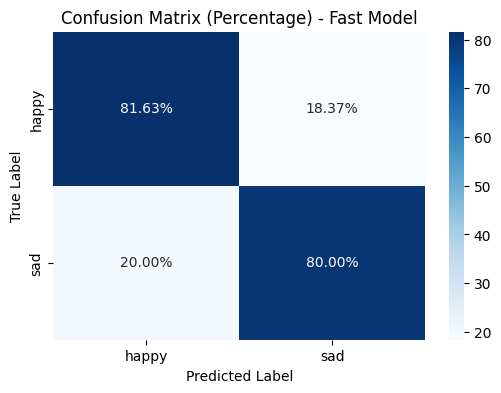

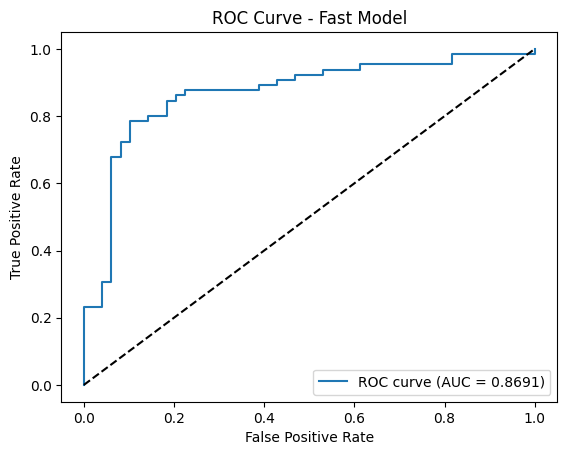

In [50]:
fast_model()

Training Accurate Model...
Found 23229 images belonging to 8 classes.
Found 5813 images belonging to 8 classes.
Epoch 1/30
726/726 [==============================] - 196s 265ms/step - loss: 2.2919 - accuracy: 0.1417 - val_loss: 2.0561 - val_accuracy: 0.1390
Epoch 2/30
726/726 [==============================] - 187s 257ms/step - loss: 2.0810 - accuracy: 0.1589 - val_loss: 2.0697 - val_accuracy: 0.1390
Epoch 3/30
726/726 [==============================] - 182s 250ms/step - loss: 1.8796 - accuracy: 0.2326 - val_loss: 2.1080 - val_accuracy: 0.1624
Epoch 4/30
726/726 [==============================] - 187s 257ms/step - loss: 1.6537 - accuracy: 0.2651 - val_loss: 2.1252 - val_accuracy: 0.1326
Epoch 5/30
726/726 [==============================] - 188s 258ms/step - loss: 1.6232 - accuracy: 0.2734 - val_loss: 2.0940 - val_accuracy: 0.1467
Epoch 6/30
726/726 [==============================] - 186s 256ms/step - loss: 1.6172 - accuracy: 0.2790 - val_loss: 1.9013 - val_accuracy: 0.1701
Epoch 7/30
7

/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

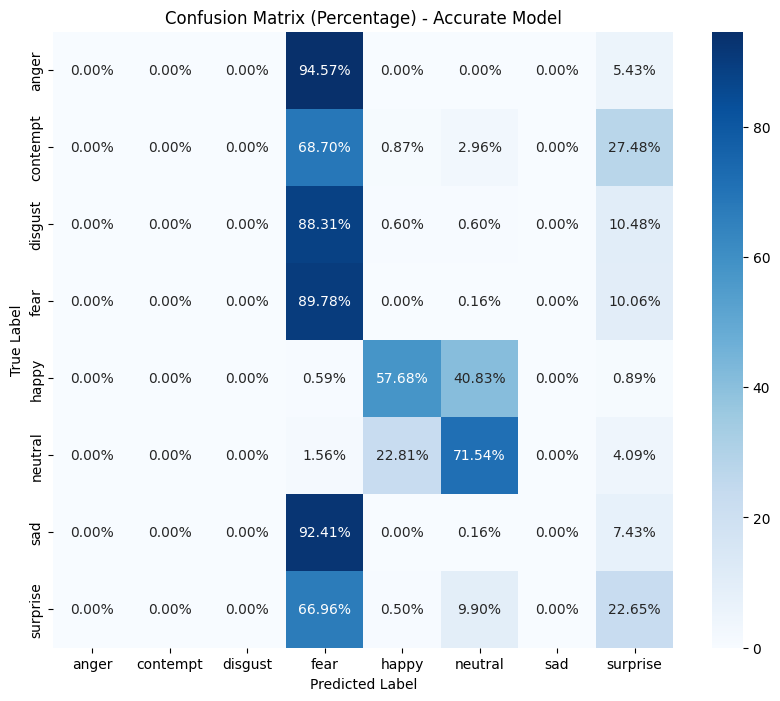

In [63]:
accurate_model()

Training Accurate Model 2 using MobileNetV2...
Found 23229 images belonging to 8 classes.
Found 5813 images belonging to 8 classes.
Epoch 1/30
726/726 [==============================] - 187s 253ms/step - loss: 2.2962 - accuracy: 0.1447 - val_loss: 2.0523 - val_accuracy: 0.1762
Epoch 2/30
726/726 [==============================] - 181s 249ms/step - loss: 2.0844 - accuracy: 0.1658 - val_loss: 2.0479 - val_accuracy: 0.1736
Epoch 3/30
726/726 [==============================] - 182s 250ms/step - loss: 2.0592 - accuracy: 0.1710 - val_loss: 2.0491 - val_accuracy: 0.1736
Epoch 4/30
726/726 [==============================] - 183s 252ms/step - loss: 2.0537 - accuracy: 0.1698 - val_loss: 2.0512 - val_accuracy: 0.1736
Epoch 5/30
726/726 [==============================] - 183s 252ms/step - loss: 1.9332 - accuracy: 0.2136 - val_loss: 2.0122 - val_accuracy: 0.1729
Epoch 6/30
726/726 [==============================] - 176s 242ms/step - loss: 1.7067 - accuracy: 0.2554 - val_loss: 1.9055 - val_accuracy:

/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abdo/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

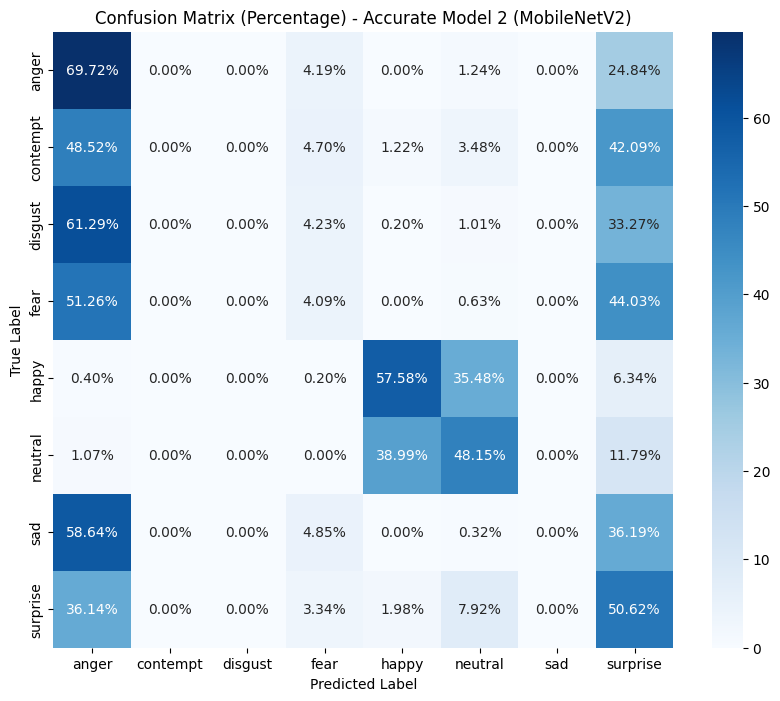

In [62]:
accurate_model_2()